## Exploratory Data Analysis of the 2016 Presidential Campaign Expenditures
<img src="debate.jpg"  style="width: 1000px;" height="100px"/>

#### Importing Data and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
campaignExp = pd.read_csv('data/expenditures.csv')

### Analyzing Campaign Expenditures

In [165]:
campaignExp['candidate_name'].unique()

array(['RUBIO, MARCO', 'SANTORUM, RICHARD J.', 'PERRY, JAMES R. (RICK)',
       'CARSON, BENJAMIN S.', "CRUZ, RAFAEL EDWARD 'TED'", 'PAUL, RAND',
       'CLINTON, HILLARY RODHAM'], dtype=object)

In [10]:
campaignExp.head()

,committee_id,candidate_id,candidate_name,recipient_name,disbursement_amount,disbursement_date,recipient_city,recipient_state,recipient_zipcode,disbursement_desc,memo_code,memo_text,form_type,file_number,transaction_id,election_type
0,C00458844,P60006723,"RUBIO, MARCO","GREEN, PERRY MR.",500.00,15-Sep-15,ANCHORAGE,AK,995084442,IN-KIND CONTRIBUTION,NaN,IN KIND: FACILITY RENTAL,SB23,1031526,SB23.831217,P2016
1,C00458844,P60006723,"RUBIO, MARCO",ALASKA REPUBLICAN PARTY,2500.00,16-Nov-15,ANCHORAGE,AK,99503,BALLOT ACCESS,NaN,NaN,SB23,1047126,SB23.I14767,NaN
2,C00458844,P60006723,"RUBIO, MARCO","JOHNSON, MARK",1000.00,30-Sep-15,ANCHORAGE,AK,995163436,IN-KIND CONTRIBUTION,NaN,IN KIND: BUMPER STICKERS SIGNS AND BUTTONS,SB23,1031526,SB23.831218,P2016
3,C00458844,P60006723,"RUBIO, MARCO",ENTERPRISE,336.09,18-Dec-15,BIRMINGHAM,AL,352124572,CAR RENTAL,X,NaN,SB23,1047126,SB23.I15112,NaN
4,C00458844,P60006723,"RUBIO, MARCO",U.S. SPACE AND ROCKET CENTER,2000.00,7-Apr-16,HUNTSVILLE,AL,35805,SITE RENTAL,NaN,NaN,SB23,1073515,SB23.4226,P2016


#### (Q1): What State Did Candidates Spend The Most Money In?

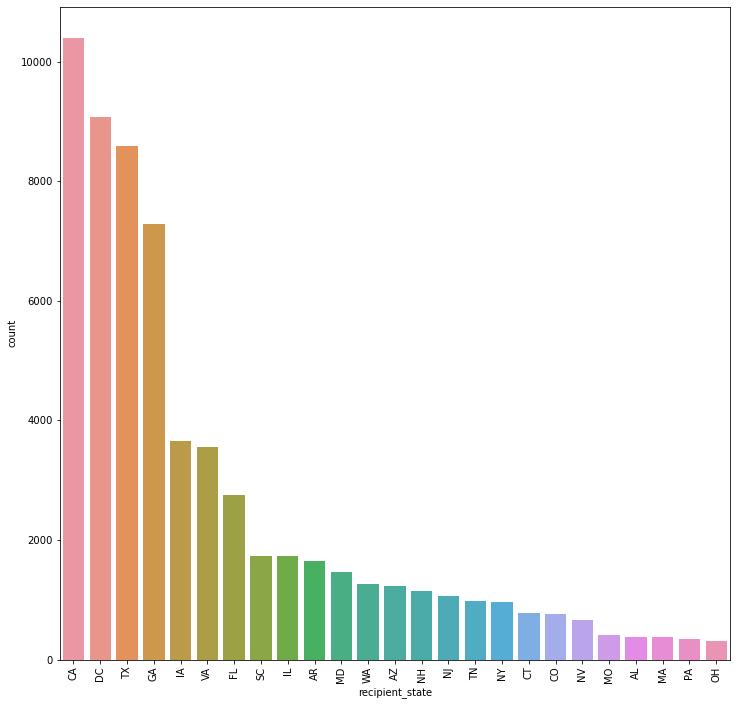

In [28]:
plt.figure(figsize=(12,12))
sns.countplot(data=campaignExp, x='recipient_state', order = campaignExp['recipient_state'].value_counts().iloc[:25].index)
plt.xticks(rotation=90)
plt.show()

California, Washington DC, Texas, and Georgia are the most frequent campaign States. Each with over 6000 disbursments 

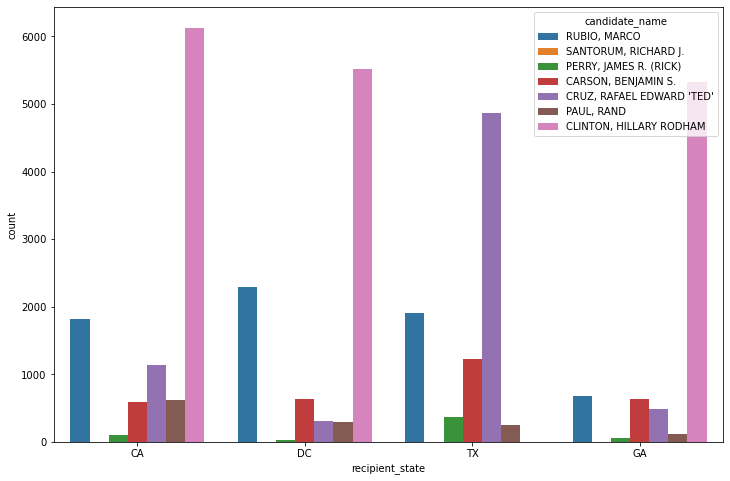

In [98]:
plt.figure(figsize=(12,8))
sns.countplot(data=campaignExp, x='recipient_state', hue= 'candidate_name', order = campaignExp['recipient_state'].value_counts().iloc[:4].index)
plt.show()

Each State except Texas is where Hilary most frequently spends money for her campaign. Ted cruz spends most significantly in Texas. This is probably because Texas is where Ted Cruz is senator. Marco Rubio conisistently is second place in each of the four top states. 

#### (Q2): In Which State is the Most Money Total Spent and by what Candidate?

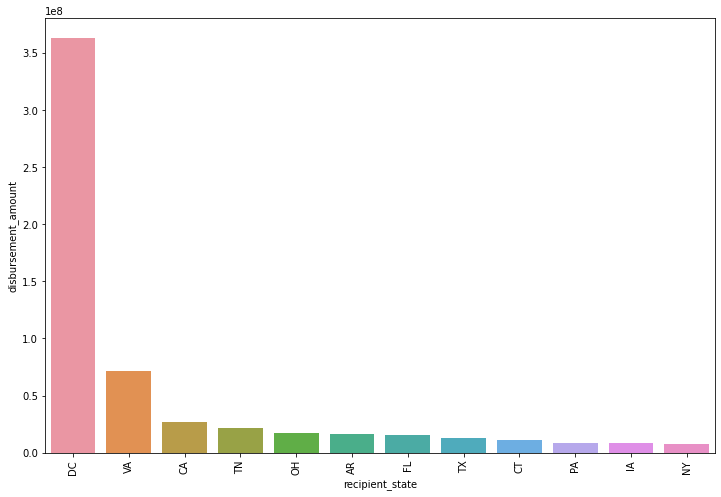

In [160]:
campaignExpTotal = campaignExp.groupby(['recipient_state'])['disbursement_amount'].sum().reset_index()
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(data=campaignExpTotal, x='recipient_state', y='disbursement_amount', order=campaignExpTotal.sort_values('disbursement_amount',ascending = False).recipient_state.iloc[:12])
plt.show()

Washignton DC is where the most money is spent despite being second in total disbursments. Virginia is second in total money spent despite being sixth in total recipients. California is in third although they were first in total disbursments. 

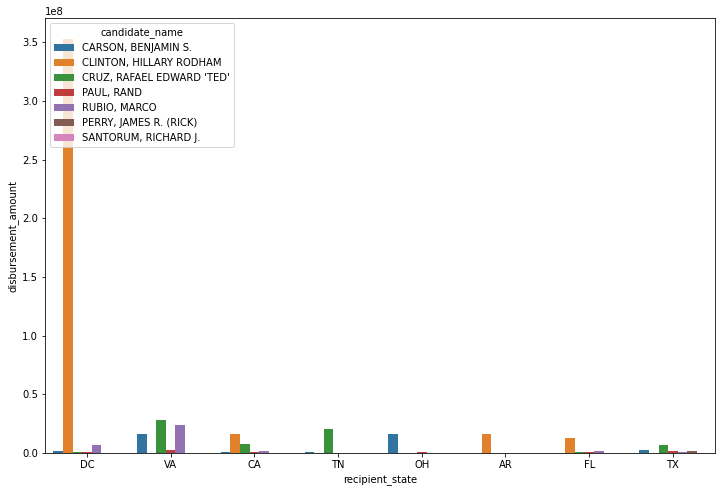

In [105]:
campaignExpTotal_cand = campaignExp.groupby(['recipient_state','candidate_name'])['disbursement_amount'].sum().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=campaignExpTotal_cand, x='recipient_state', y='disbursement_amount', hue="candidate_name", order=campaignExpTotal.sort_values('disbursement_amount',ascending = False).recipient_state.iloc[:8])
plt.show()

Hilary Clinton spends majority of the donation money in DC, California, Arkansas and Florida, with the rest of the field picking up spending throughout the rest of the states. 

#### (Q3): Which Candidates spends the most money?

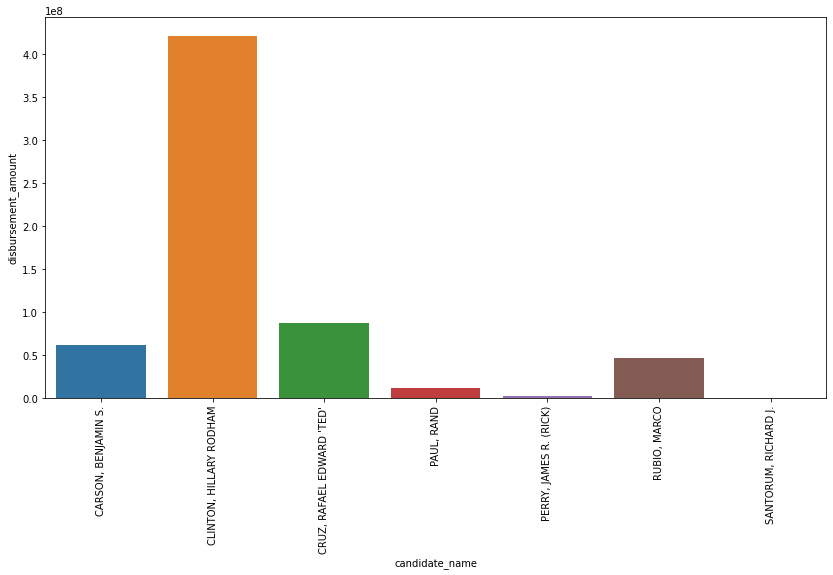

In [155]:
campaignExpCand = campaignExp.groupby(['candidate_name'])['disbursement_amount'].sum().reset_index()


## Changing Scientific Notation to Normal Values
campaignExpCand['disbursement_amount'] = campaignExpCand['disbursement_amount'].apply(lambda x: '%.5f' % x)
campaignExpCand['disbursement_amount'] = campaignExpCand['disbursement_amount'].astype('float')

plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
sns.barplot(data=campaignExpCand, x='candidate_name', y='disbursement_amount')
plt.show()

Hilary Clinton spent the most money, with Ted Cruz and Ben Carson following in respective orders. Richard Santorum was last without any money spent.

#### (Q4): What does Hilary Clinton spend most of her campaign donations on?

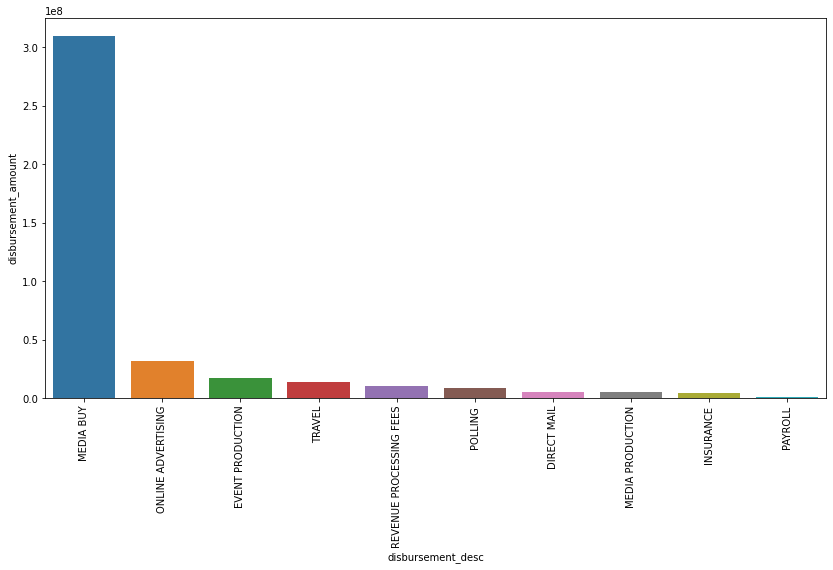

In [176]:
campaignExpHilary = campaignExp[campaignExp['candidate_name'] == 'CLINTON, HILLARY RODHAM']

campaignExpHilaryDisb = campaignExpHilary.groupby(['disbursement_desc'])['disbursement_amount'].sum().reset_index()

plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
sns.barplot(data=campaignExpHilaryDisb, x='disbursement_desc', y='disbursement_amount', order=campaignExpHilaryDisb.sort_values('disbursement_amount',ascending = False).disbursement_desc.iloc[:10])

plt.show()

Hilary Clinton spent most of her money on Advertising. Mostly TV, with second being online Advertisments. 

#### (Q5): Is there a trend to Hilary Clinton's campaign spending overtime?

In [260]:
### Changing Disbursement Dates to Date Time
campaignExpHilary['disbursement_date'] = pd.to_datetime(campaignExpHilary['disbursement_date'])

### Adding Month and Year Columns
campaignExpHilary['month_year'] = pd.to_datetime(campaignExpHilary['disbursement_date']).dt.to_period('M')

campaignExpHilary.head()

/var/folders/x1/xynwj5mx66d5r4vf2cjj44q40000gn/T/ipykernel_23565/107008115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaignExpHilary['disbursement_date'] = pd.to_datetime(campaignExpHilary['disbursement_date'])
/var/folders/x1/xynwj5mx66d5r4vf2cjj44q40000gn/T/ipykernel_23565/107008115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaignExpHilary['month_year'] = pd.to_datetime(campaignExpHilary['disbursement_date']).dt.to_period('M')


,committee_id,candidate_id,candidate_name,recipient_name,disbursement_amount,disbursement_date,recipient_city,recipient_state,recipient_zipcode,disbursement_desc,memo_code,memo_text,form_type,file_number,transaction_id,election_type,month,year,month_year
42318,C00575795,P00003392,"CLINTON, HILLARY RODHAM",MARSCH ENTERPRISES,1500.00,2016-03-31,ANCHORAGE,AK,995240826,RENT,NaN,NaN,SB23,1081062,D181938,P2016,3,2016,2016-03
42319,C00575795,P00003392,"CLINTON, HILLARY RODHAM","LAUESEN, JENNY",591.99,2016-11-22,ANCHORAGE,AK,99508,PAYROLL,NaN,NaN,SB23,1133832,D363462,G2016,11,2016,2016-11
42320,C00575795,P00003392,"CLINTON, HILLARY RODHAM","TICE, CHARLES",30.00,2016-05-13,ANCHORAGE,AK,99501,PHONE,NaN,NaN,SB23,1091720,D201514,P2016,5,2016,2016-05
42321,C00575795,P00003392,"CLINTON, HILLARY RODHAM","GROH, KEVIN DANIEL",1345.63,2016-03-15,SITKA,AK,998357659,PAYROLL,NaN,NaN,SB23,1081062,D171478,P2016,3,2016,2016-03
42322,C00575795,P00003392,"CLINTON, HILLARY RODHAM",MARSCH ENTERPRISES,1500.00,2016-03-31,ANCHORAGE,AK,995240826,RENT,NaN,NaN,SB23,1081062,D181939,P2016,3,2016,2016-03


In [255]:
campaignExpHilaryTotal_byDate = campaignExpHilary.groupby(['month_year'])['disbursement_amount'].sum().reset_index()
campaignExpHilary['month_year'] = campaignExpHilary['month_year'].astype(str)

campaignExpHilaryTotal_byDate.head()

/var/folders/x1/xynwj5mx66d5r4vf2cjj44q40000gn/T/ipykernel_23565/3666238030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaignExpHilary['month_year'] = campaignExpHilary['month_year'].astype(str)


,month_year,disbursement_amount
0,2015-01,12499.50
1,2015-02,505.82
2,2015-03,18413.35
3,2015-04,278130.02
4,2015-05,1757662.06


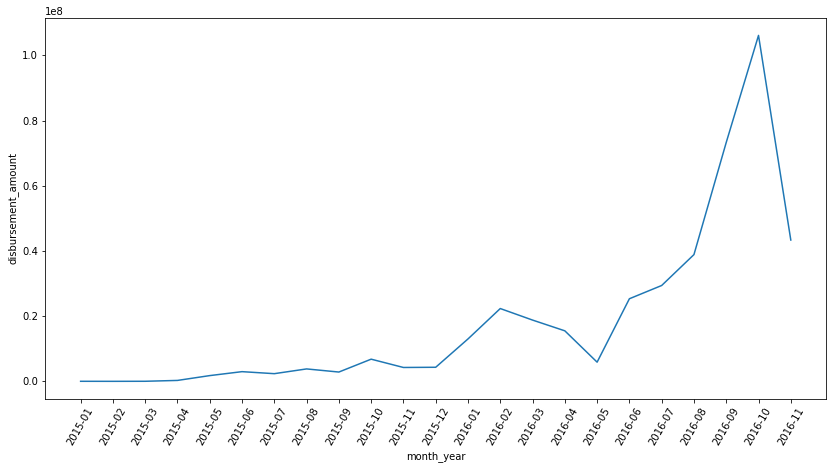

In [258]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
sns.lineplot(data= campaignExpHilaryTotal_byDate, x='month_year', y='disbursement_amount')
plt.show()